In [1]:
import libpysal
import geopandas as gpd

c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\alpha_shapes.py:199: N

In [5]:
snow = gpd.read_file(r"C:\Users\ehdwn\OneDrive\바탕 화면\python\esda\snow\snow1\deaths_nd_by_house.shp")

In [8]:
# Take a look at attributes of the object
snow.tail()

,ID,deaths_r,deaths_nr,deaths,pestfield,dis_pestf,dis_sewers,dis_bspump,death_dum,COORD_X,COORD_Y,geometry
1847,1848.0,0.0,0.0,0.0,0.0,249.82,22.11,191.88,0.0,529586.068503,180995.318811,POINT (529586.069 180995.319)
1848,1849.0,0.0,0.0,0.0,0.0,239.67,4.75,197.54,0.0,529566.838576,180925.026395,POINT (529566.839 180925.026)
1849,1850.0,0.0,0.0,0.0,0.0,295.72,18.06,261.31,0.0,529605.567477,180868.310800,POINT (529605.567 180868.311)
1850,1851.0,0.0,0.0,0.0,0.0,317.18,6.00,286.47,0.0,529616.019553,180841.028775,POINT (529616.020 180841.029)
1851,1852.0,0.0,0.0,0.0,0.0,333.69,7.33,299.40,0.0,529638.134482,180848.293827,POINT (529638.134 180848.294)


<Axes: >

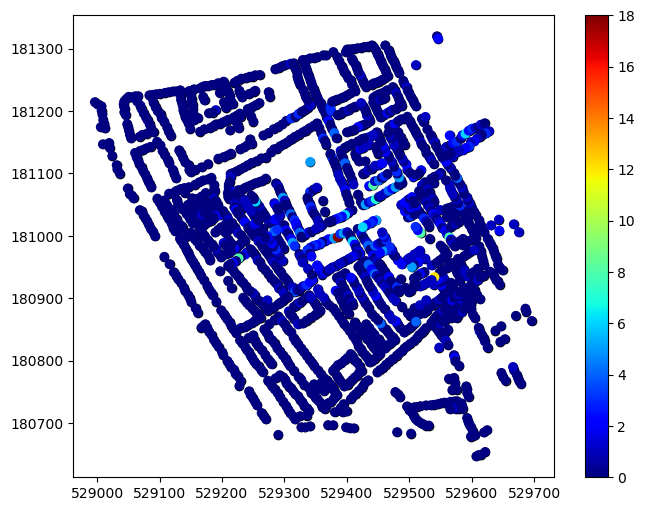

In [37]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,6))
snow.plot(color='white', edgecolor='black', ax=ax)
snow.plot(column='deaths', cmap='jet', legend=True, ax=ax)

In [30]:
snow['sewer'] = 0
snow.loc[snow['dis_sewers'] <= 10, 'sewer'] = 1

In [29]:
total = sum(snow['sewer'] >= 1)
total

374

<Axes: >

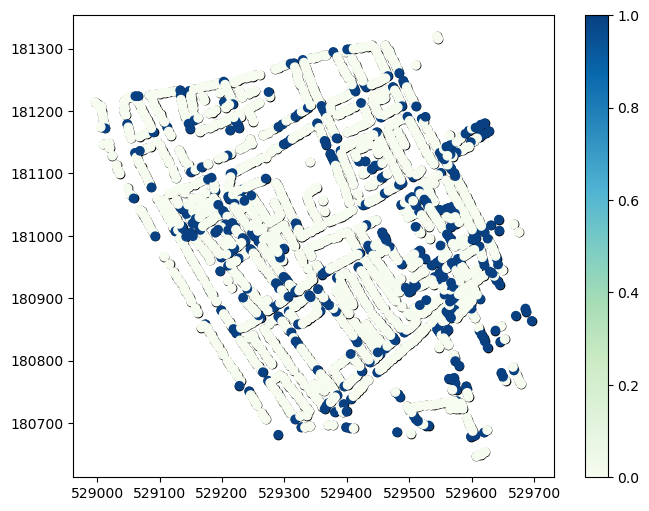

In [35]:
fig,ax = plt.subplots(figsize=(8,6))
snow.plot(color='white', edgecolor='black', ax=ax)
snow.plot(column='sewer',cmap='GnBu', legend=True, ax=ax)

### Univariate LJC of snow
I am goingt use ('dis_serwers'= distance to sewer) for the following analysis to see how they clustered within 10m of each sewer. 

In [38]:
w = libpysal.weights.Queen.from_dataframe(snow)

c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\voronoi.py:173: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  region_df["geometry"] = [Polygon(vertices[region]) for region in regions]
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\cg\voronoi.py:176: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use

c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neighbors].centroid.apply(lambda p: (p.x, p.y))
c:\Users\ehdwn\anaconda3\lib\site-packages\libpysal\weights\weights.py:1296: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  centroids = gdf.loc[neig

(<Figure size 640x480 with 1 Axes>, <Axes: >)

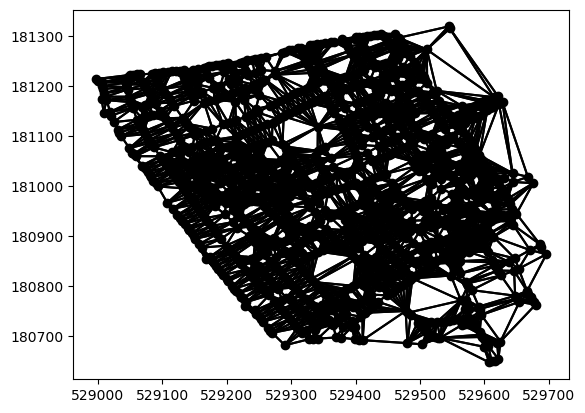

In [65]:
w.plot(snow)

In [43]:
from esda.join_counts_local import Join_Counts_Local
LJC_uni = Join_Counts_Local(connectivity = w).fit(snow['sewer'])

In [46]:
LJC_uni.LJC

array([0., 0., 0., ..., 0., 4., 5.])

In [56]:
total_l = sum(LJC_uni.LJC > 1)
total_l

306

The value greater than 1, itself represents the number of neighbors with similar ['sewer'] values which are 'snow['dis_sewers'] <= 10'.

In [49]:
LJC_uni.p_sim

array([  nan,   nan,   nan, ...,   nan, 0.018, 0.018])

In [50]:
total_p = sum(LJC_uni.p_sim <= 0.05)
total_p

85

85 area are less than 0.05, which means that the areas are statistically significant. (there are spatial autocorrelation with ['sewer'])

In [51]:
snow['LJC_UNI'] = LJC_uni.LJC
snow['LJC_UNI_p_sim'] = LJC_uni.p_sim

<Axes: >

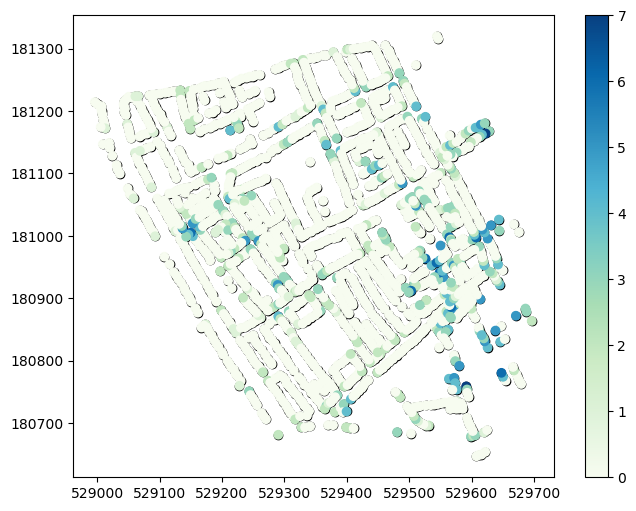

In [52]:
fig,ax = plt.subplots(figsize=(8,6))
snow.plot(color='white', edgecolor='black', ax=ax)
snow.plot(column='LJC_UNI',cmap='GnBu', legend=True, ax=ax)

<Axes: >

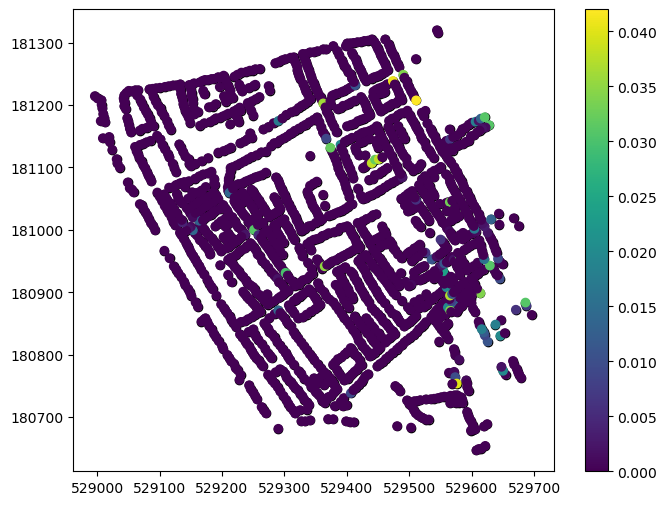

In [55]:
snow['LJC_UNI_p_sim_sig'] = 0
snow.loc[snow['LJC_UNI_p_sim'] <= 0.05, 'LJC_UNI_p_sim_sig'] = snow['LJC_UNI_p_sim']

fig,ax = plt.subplots(figsize=(8, 6))
snow.plot(color='white', edgecolor='black', ax=ax)
snow.plot(column='LJC_UNI_p_sim_sig',
               legend=True, ax=ax)

Text(0.5, 1.0, 'P-Valuce')

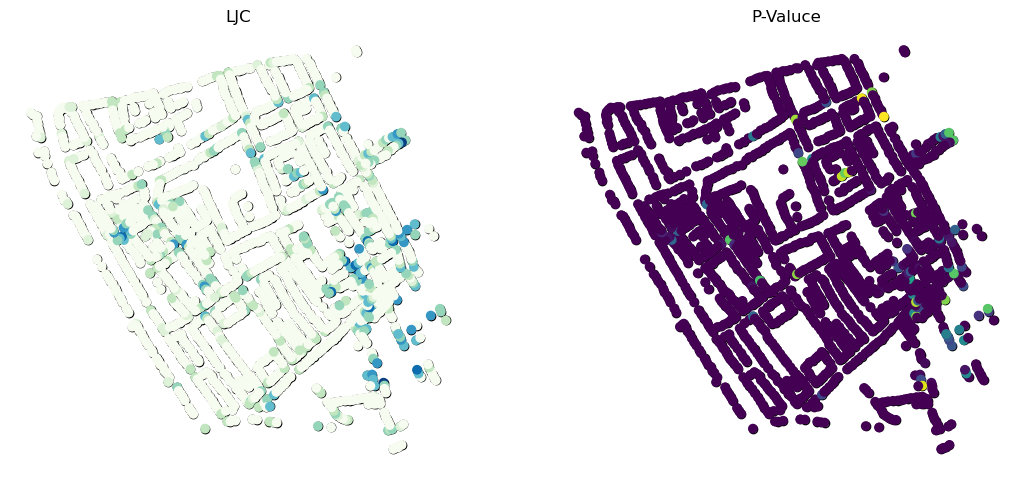

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(2.16*6,6))
snow.plot(color='white', edgecolor='black', ax=ax[0])
snow.plot(column='LJC_UNI',categorical=True, cmap='GnBu', ax=ax[0])
snow.plot(color='white', edgecolor='black', ax=ax[1])
snow.plot(column='LJC_UNI_p_sim_sig', ax=ax[1])
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('LJC')
ax[1].set_title('P-Valuce')